In [2]:
using FileIO
using Plots
import JSON

In [89]:
json_name = "../plate_calibration/A384well/plate1_20240420_rapid_scan_plate_A384_10x.json";
metainfo = Dict();
open(json_name, "r") do f
    global metainfo;
    dicttxt = readlines(f);  # file information to string
    metainfo=JSON.parse(dicttxt[1]);  # parse and transform data
end

Dict{String, Any} with 9 entries:
  "chsetup"           => Any[Dict{String, Any}("name"=>"BF", "em"=>"1-Empty", "…
  "position_list"     => Any[Dict{String, Any}("name"=>"well47_1", "z_um"=>5500…
  "channel_sequence"  => 2
  "chsetting"         => ""
  "exposure_sequence" => 100
  "roi"               => Any[0, 0, 3200, 3200]
  "sample_name"       => "plate1-sto-gfp-conditioned-medium"
  "data_dir"          => "E:/XJF/20240420/plate1-sto-gfp-conditioned-medium"
  "well_plate"        => Dict{String, Any}("nwell"=>308, "view"=>Any[Any[825, -…

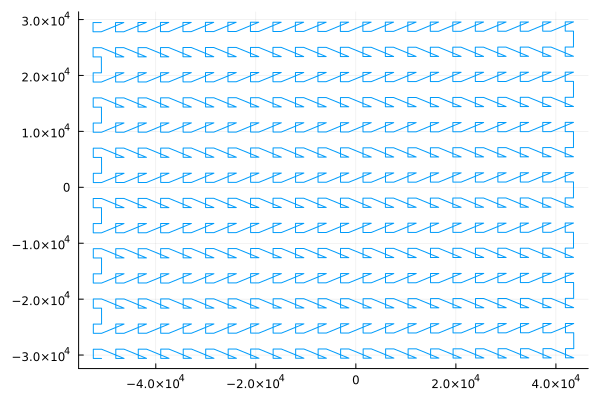

In [90]:
x = [ pos["x_um"] for pos in metainfo["position_list"]];
y = [ pos["y_um"] for pos in metainfo["position_list"]];
plot(x, y, label="")

In [102]:
position_num = length(metainfo["position_list"]);
Graph = zeros(position_num, position_num);
for i=1:position_num
    p1_x = metainfo["position_list"][i]["x_um"];
    p1_y = metainfo["position_list"][i]["y_um"];
    for j=1:position_num
        p2_x = metainfo["position_list"][j]["x_um"];
        p2_y = metainfo["position_list"][j]["y_um"];
        weight = ((p1_x-p2_x)^2+(p1_y - p2_y)^2)^0.5;
        Graph[i,j] = weight;
    end
end

In [8]:
using TravelingSalesmanHeuristics

In [ ]:
@time path, cost = solve_tsp(Graph; quality_factor = 90)
x_tsp = [ metainfo["position_list"][path[i]]["x_um"] for i in 1:position_num];
y_tsp = [ metainfo["position_list"][path[i]]["y_um"] for i in 1:position_num];
plot(x_tsp, y_tsp, label="")

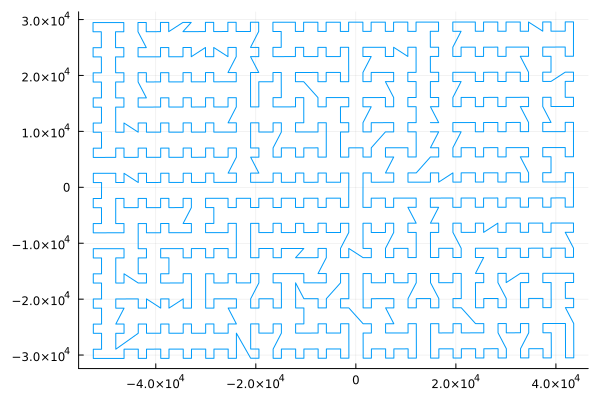

In [105]:
plot(x_tsp, y_tsp, label="")

In [92]:
position_list_optim = [ metainfo["position_list"][path[i]] for i in 1:position_num];
metainfo["position_list"] = position_list_optim;

In [93]:
open(json_name, "w") do f
    JSON.print(f, metainfo)
end

# Extract

In [59]:
using TravelingSalesmanExact, SCIP

In [ ]:
tour, cost = get_optimal_tour(Graph, SCIP.Optimizer; verbose = true);

[ Info: Solved subcluster problem with 4 cities in time 7.143945844 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.008732575 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.007272419 seconds
[ Info: Solved subcluster problem with 48 cities in time 0.604268394 seconds
[ Info: Solved subcluster problem with 28 cities in time 0.136036059 seconds
[ Info: Solved subcluster problem with 8 cities in time 0.01472592 seconds
[ Info: Solved subcluster problem with 8 cities in time 0.013045341 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.008591271 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.007729702 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.007406404 seconds
[ Info: Solved subcluster problem with 8 cities in time 0.012898007 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.007440685 seconds
[ Info: Solved subcluster problem with 4 cities in time 0.007342008 seconds
[ Info: Sol

In [ ]:
tour